In [67]:
import math
from importlib import reload
import GraphSolver as G
from qiskit import transpile, Aer, execute, QuantumCircuit
import functools
import numpy as np
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.visualization import plot_state_paulivec
from matplotlib.ticker import StrMethodFormatter
reload(G)

 Name              Qubits   Status   Access?  Degraded?  avg. Queue Time  (last updated)
 qpu.harmony:       11    available    Yes      No      2 days, 16:08:50  (2023-08-10 10:46:18)
 qpu.aria-1:        25    available    Yes      No               1:46:52  (2023-08-10 10:46:18)
 simulator:         29    available    Yes      No               0:03:39  (2023-08-10 10:46:18)


<module 'GraphSolver' from '/Users/marklevin/PycharmProjects/GroverGraphSolver/GraphSolver.py'>

 Name              Qubits   Status   Access?  Degraded?  avg. Queue Time  (last updated)
 qpu.harmony:       11    available    Yes      No      2 days, 16:26:29  (2023-08-10 11:16:35)
 qpu.aria-1:        25    available    Yes      No               2:16:52  (2023-08-10 11:16:35)
 simulator:         29    available    Yes      No               0:10:13  (2023-08-10 11:16:35)


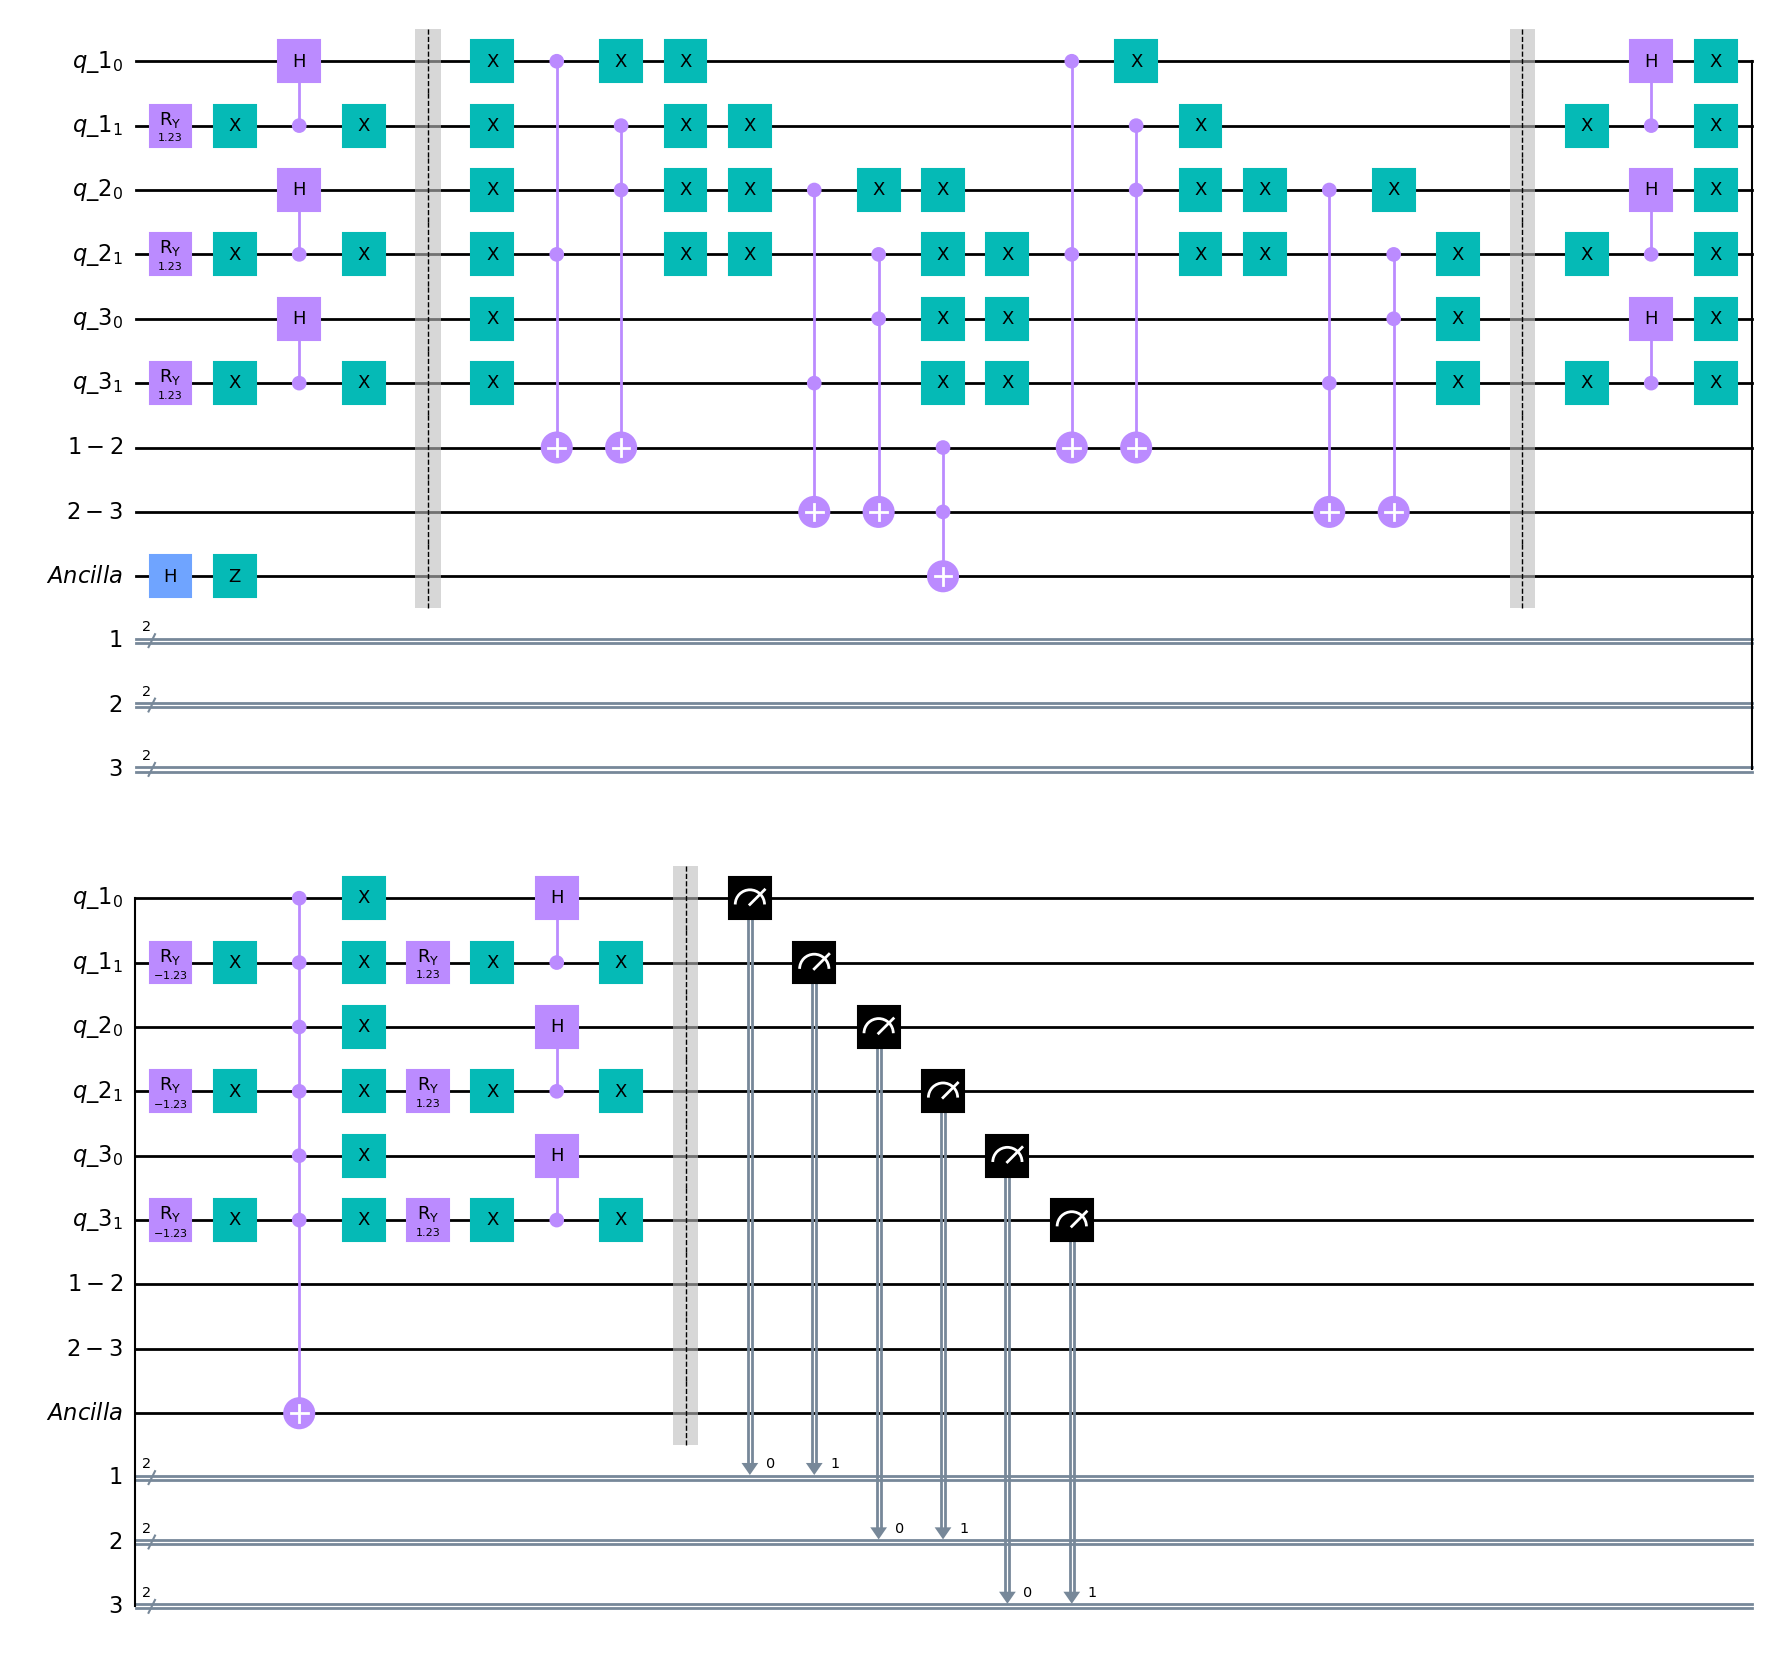

In [69]:
reload(G)
node1 = G.Node(1, ['red', 'pink', 'blue'])
node2 = G.Node(2, ['red', 'pink', 'blue'])
node3 = G.Node(3, ['red', 'pink', 'blue'])
edge1 = G.Edge(node1, node2)
edge2 = G.Edge(node2, node3)
nodes = (node1, node2, node3)
edges = (edge1,edge2)

graph1 = G.GraphSolver(nodes, edges, True)
qc1 = graph1._solve(1)
qc1.draw(output='mpl')
#colors1, qc1, j1, count1 = graph1.run()
#colors1

In [153]:
def angle(a,b):
    return math.asin(math.sqrt(a / b))

def in_binary(n, d):
    return n % 2**(d + 1) >= 2**d

def make_init(n):
    j = math.ceil(math.log(n, 2))
    qc = QuantumCircuit(j)
    i = 1
    while n % 2**i == 0:
        qc.h(i - 1)
        i += 1
    c = []
    for x in range(j - 1, i - 2, -1):
        if in_binary(n - 1,x):
            qc.s(x)
            qc.h(x)
            if j - 1 == x:
                qc.rz(angle(n % 2**x, n), x)
                qc.x(x)
                qc.rz(-angle(n % 2**x, n), x)
            else:
                qc.rz(angle(n % 2**x, n % 2**c[-1]), x)
                qc.cx(c[-1],x)
                qc.rz(-angle(n % 2**x, n % 2**c[-1]), x)
            qc.h(x)
            qc.sdg(x)
            c.append(x)
    c.append(i - 1)
    for x in range(i - 1, j - 1):
        if x == c[-1]:
            if x != i - 1:
                qc.x(c[-1])
            del c[-1]
            qc.x(c[-1])
        qc.s(x)
        qc.h(x)
        qc.t(x)
        qc.cx(c[-1], x)
        qc.tdg(x)
        qc.h(x)
        qc.sdg(x)
    if i - 1 != j:
        qc.x(-1)
    return qc

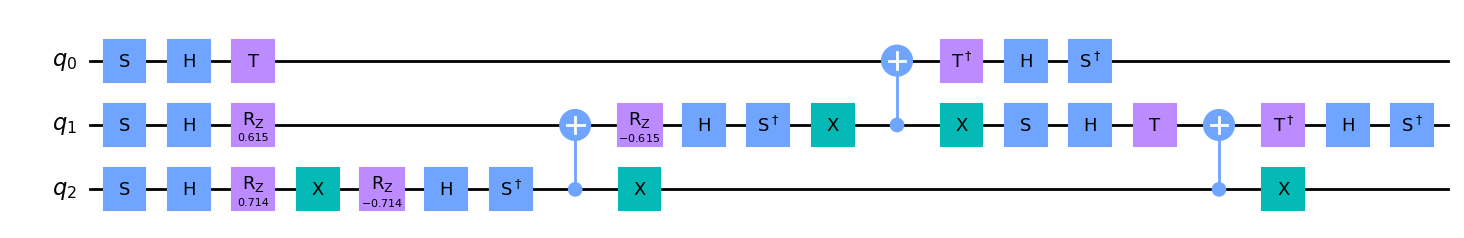

In [154]:
aer_sim = Aer.get_backend('aer_simulator')
qc = make_init(7)
qc.draw(output='mpl')

Statevector([3.77964473e-01-1.38777878e-16j,
             3.77964473e-01+1.38777878e-16j,
             3.77964473e-01-2.77555756e-17j,
             3.77964473e-01+2.77555756e-17j,
             3.77964473e-01+2.77555756e-17j,
             3.77964473e-01-7.11101414e-17j,
             3.77964473e-01+5.55111512e-17j,
             5.14839856e-17+5.55111512e-17j],
            dims=(2, 2, 2))


/Users/marklevin/.pyenv/versions/QC/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/marklevin/.pyenv/versions/QC/lib/python3.7/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/marklevin/.pyenv/versions/QC/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing n

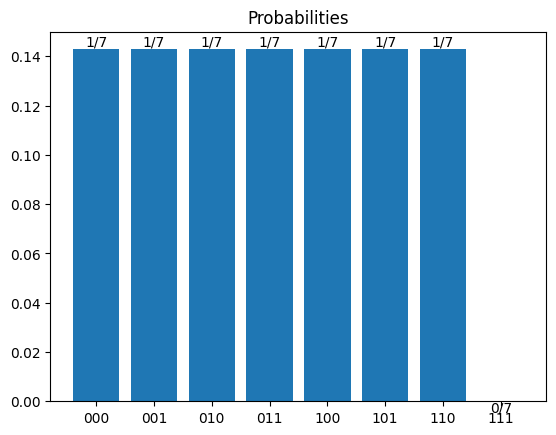

In [143]:
qc.save_statevector()
result = execute(qc, backend=aer_sim).result()
plot = plt.bar([f"{x:03b}" for x in range(8)], [x ** 2 for x in result.data()['statevector']])
plt.bar_label(plot, labels=[f"{int(7 * float(x ** 2) + 0.5)}/7" for x in result.data()['statevector']])
plt.title("Probabilities");
print(result.data()['statevector'])

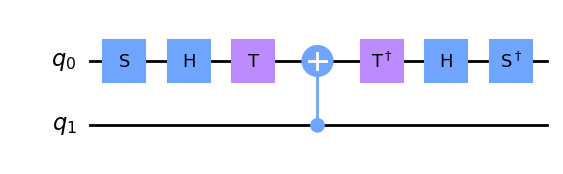

In [137]:
qc = QuantumCircuit(2)
qc.s(0)
qc.h(0)
qc.t(0)
qc.cx(1,0)
qc.tdg(0)
qc.h(0)
qc.sdg(0)
qc.draw(output='mpl')